# Abstract

The main aim of this dataset kaggle competition is to categorize Ghost, Ghoul and Goblin based on their bone length measurements, severity of rot, extent of soullessness, and other characteristics to distinguish (and extinguish) the intruders using classification algorithms like XGBClassifier, Naive-Bayes, Logistic Regression, Random Forest algorithm and finding by which algorithm we are getting the best categorization accuracy. 

In [427]:
pwd

'C:\\Users\\surak'

In [428]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
#Gradient Boosting
from xgboost.sklearn import XGBClassifier

from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
import statsmodels as statm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [429]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

# df1 = Trainset
# df2 = Testset

In [430]:
df1.apply(lambda x: sum(x.isnull()),axis=0)

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

In [431]:
df2.apply(lambda x: sum(x.isnull()),axis=0)

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
dtype: int64

## This indicates there is no missing data in the dataset, also no bad data is there in data frame.

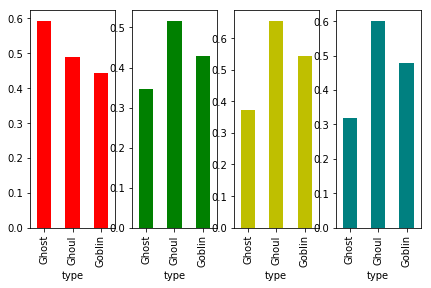

In [432]:
plt.subplot(1,4,1)
df1.groupby('type').mean()['rotting_flesh'].plot(kind='bar',figsize=(7,4), color='r')
plt.subplot(1,4,2)
df1.groupby('type').mean()['bone_length'].plot(kind='bar',figsize=(7,4), color='g')
plt.subplot(1,4,3)
df1.groupby('type').mean()['hair_length'].plot(kind='bar',figsize=(7,4), color='y')
plt.subplot(1,4,4)
df1.groupby('type').mean()['has_soul'].plot(kind='bar',figsize=(7,4), color='teal')

C:\Users\surak\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\surak\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


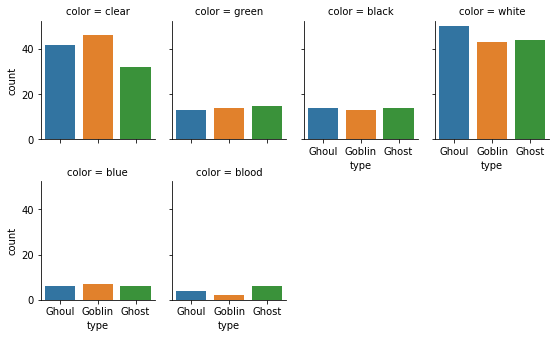

In [433]:
sns.factorplot("type", col="color", col_wrap=4, data=df1, kind="count", size=2.4, aspect=.8)

C:\Users\surak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


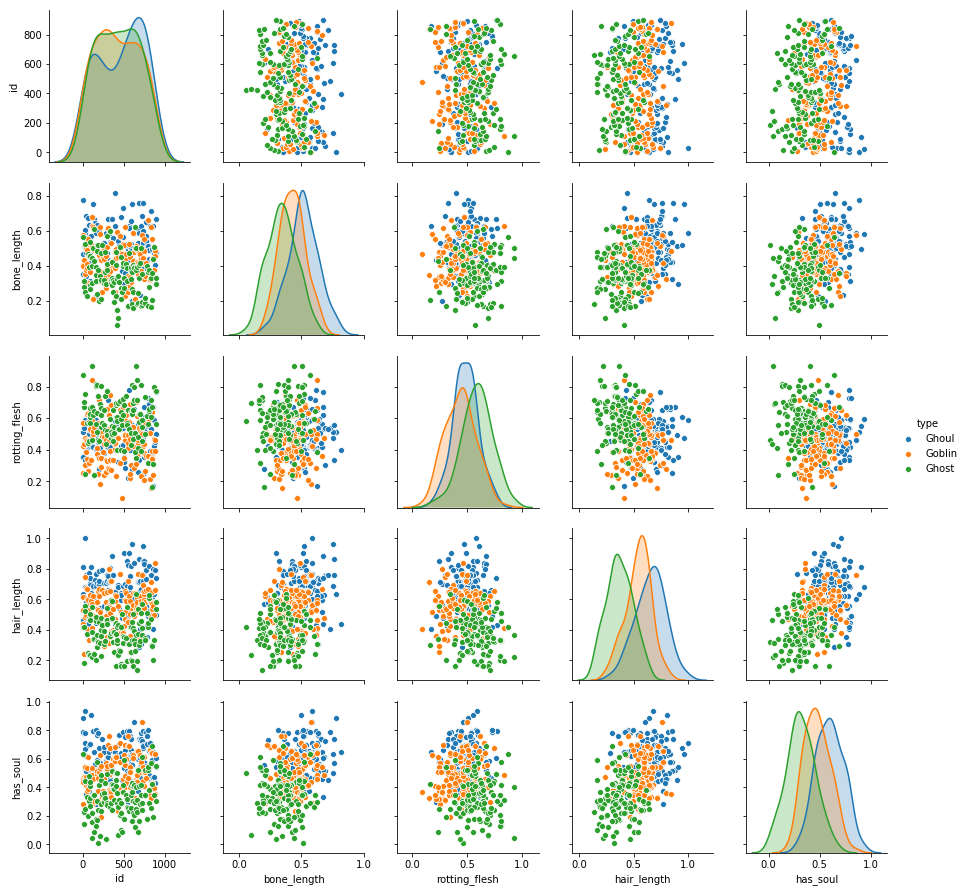

In [434]:
sns.pairplot(df1, hue='type')

In [435]:
# check X and Y shape
print('df1 Shape:', df1.shape)
print('df2 Shape:', df2.shape)

df1 Shape: (371, 7)
df2 Shape: (529, 6)


In [436]:
#Separating the dependent variable from the independent variables
y_train = df1.iloc[:,-1]
print(y_train)

0       Ghoul
1      Goblin
2       Ghoul
3       Ghoul
4       Ghost
5      Goblin
6      Goblin
7       Ghoul
8       Ghost
9       Ghost
10     Goblin
11      Ghoul
12      Ghoul
13     Goblin
14     Goblin
15      Ghoul
16      Ghost
17      Ghoul
18      Ghoul
19      Ghost
20     Goblin
21      Ghoul
22     Goblin
23      Ghoul
24      Ghoul
25      Ghost
26     Goblin
27     Goblin
28     Goblin
29     Goblin
        ...  
341    Goblin
342     Ghoul
343    Goblin
344     Ghost
345     Ghoul
346    Goblin
347     Ghost
348    Goblin
349     Ghoul
350     Ghost
351    Goblin
352     Ghoul
353    Goblin
354     Ghost
355    Goblin
356    Goblin
357     Ghoul
358     Ghost
359     Ghoul
360     Ghoul
361     Ghoul
362    Goblin
363     Ghost
364    Goblin
365     Ghoul
366    Goblin
367     Ghost
368     Ghoul
369     Ghost
370     Ghoul
Name: type, Length: 371, dtype: object


In [437]:
x_train = df1.iloc[:,1:-1]
print(x_train)

     bone_length  rotting_flesh  hair_length  has_soul  color
0       0.354512       0.350839     0.465761  0.781142  clear
1       0.575560       0.425868     0.531401  0.439899  green
2       0.467875       0.354330     0.811616  0.791225  black
3       0.776652       0.508723     0.636766  0.884464  black
4       0.566117       0.875862     0.418594  0.636438  green
5       0.405680       0.253277     0.441420  0.280324  green
6       0.399331       0.568952     0.618391  0.467901  white
7       0.516224       0.536429     0.612776  0.468048  clear
8       0.314295       0.671280     0.417267  0.227548   blue
9       0.280942       0.701457     0.179633  0.141183  white
10      0.431685       0.438959     0.239212  0.471820  clear
11      0.584543       0.593082     0.681166  0.935721  clear
12      0.390712       0.335069     0.556109  0.784217  white
13      0.351559       0.471078     0.484458  0.465328  black
14      0.513387       0.301345     0.745676  0.545792  clear
15      

# XGBoosting Classifier Algorithm

In [438]:
#For encoding the categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_COL= LabelEncoder()
y_train= labelencoder_Y.fit_transform(y_train)  
#print(y_train)
x_train['color']=labelencoder_COL.fit_transform(x_train['color'])
#print(x_train)

In [439]:
#Checking correlation between the independent variables
print(df1.corr()) #not much correlation amongst the variables


                     id  bone_length  rotting_flesh  hair_length  has_soul
id             1.000000    -0.062759      -0.007539     0.076475  0.100054
bone_length   -0.062759     1.000000      -0.041716     0.353881  0.381675
rotting_flesh -0.007539    -0.041716       1.000000    -0.220353 -0.132051
hair_length    0.076475     0.353881      -0.220353     1.000000  0.474835
has_soul       0.100054     0.381675      -0.132051     0.474835  1.000000


In [440]:
#For getting the accuracy of the trained models 
from sklearn import metrics


In [441]:
    # xgbclassifier
    clfX=XGBClassifier()
    clfX.fit(x_train, y_train) 
    y_predX = clfX.predict(x_train)
    print(metrics.accuracy_score(y_train,y_predX))

0.9380053908355795


## By performing the XGB classifier algorithm we are getting accuracy 0.9380053908355795 which is really good.


# Generating the submission file


In [442]:
print ('\nColumns in the testing data:')
print (df2.columns)


Columns in the testing data:
Index(['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color'],
      dtype='object')


In [443]:
submission = pd.DataFrame({'id' : df2['id'], 'type' : y_pred})
submission.to_csv('s1.csv', index = False)

# Naive-Bayes Algorithm

In [444]:
#Naive-Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_train)
print(metrics.accuracy_score(y_train,y_pred))

0.7493261455525606


### By performing the Naive-Bayes algorithm we are getting accuracy 0.7493261455525606 

# Logistic Regression

In [445]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [446]:
train_data = df1.drop(['id'], axis = 1)
test_data = df2.drop(['id'], axis = 1)

In [447]:
train_data.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


In [448]:
test_data.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,529.000000,529.000000,529.000000,529.000000
mean,0.425474,0.503637,0.517288,0.464096
std,0.136079,0.158552,0.171727,0.179659
min,0.000000,0.000000,0.000000,0.000000
25%,0.329383,0.393987,0.388189,0.338964
50%,0.421989,0.510065,0.520220,0.461294
75%,0.519024,0.605957,0.644824,0.584448
max,1.000000,1.000000,0.999841,1.000000


In [449]:
print(np.sort(train_data['color'].unique()))
print(np.sort(test_data['color'].unique()))

['black' 'blood' 'blue' 'clear' 'green' 'white']
['black' 'blood' 'blue' 'clear' 'green' 'white']


In [450]:
print(np.sort(train_data['type'].unique()))

['Ghost' 'Ghoul' 'Goblin']


In [451]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
accuracy_scorer = metrics.make_scorer(metrics.accuracy_score)

In [452]:
X_train = pd.get_dummies(train_data.drop('type', axis = 1))
y_train = train_data['type']
X_test = pd.get_dummies(test_data)

In [453]:
params = {'penalty':['l1', 'l2'], 'C':[1, 2, 3, 5, 10]}
lr = LogisticRegression(random_state = 0)
clf = GridSearchCV(lr, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

lr_best = LogisticRegression(penalty = 'l1', C = 1, random_state = 0)

Best score: 0.7304582210242587
Best parameters: {'C': 10, 'penalty': 'l1'}


C:\Users\surak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\surak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\surak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### By performing the Logistic Regression algorithm we are getting accuracy 0.7304582210242587 

# Random Forest Algorithm

In [454]:
from subprocess import check_output

In [455]:
train_outcome = df1["type"]
df1.drop(["type"], axis=1, inplace=True)

In [456]:
conjunto = pd.concat([df1[["id", "color"]], df2[["id", "color"]]])
conjunto_encoded = pd.get_dummies(conjunto, columns=["color"])
d1f = df1.merge(conjunto_encoded, on="id", how="left")
d2f = df2.merge(conjunto_encoded, on="id", how="left")
df1.drop(["color"], axis=1, inplace=True)
df2.drop(["color"], axis=1, inplace=True)

In [457]:
#Separating the IDs (And we don't really need the IDs of the training set)

train_id = df1[["id"]]
test_id = df2[["id"]]
df1.drop(["id"], axis=1, inplace=True)
df2.drop(["id"], axis=1, inplace=True)

In [458]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [459]:
X_train, X_val, y_train, y_val = train_test_split(df1, train_outcome, test_size=0.2)
forest = RandomForestClassifier(n_estimators=200, n_jobs=4)
forest.fit(X_train, y_train)
y_pred_val = forest.predict(X_val)

In [460]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_val, y_pred_val))
print("Haunting accuracy: {:.1%}".format(accuracy_score(y_val, y_pred_val)))

              precision    recall  f1-score   support

       Ghost       0.85      0.85      0.85        27
       Ghoul       0.78      0.82      0.80        17
      Goblin       0.80      0.77      0.79        31

   micro avg       0.81      0.81      0.81        75
   macro avg       0.81      0.82      0.81        75
weighted avg       0.81      0.81      0.81        75

Haunting accuracy: 81.3%


In [461]:
#Now, we'll train the Haunted Random Forest with the complete training set...

forest = RandomForestClassifier(n_estimators=500, n_jobs=4)
forest.fit(df1, train_outcome)
y_pred = forest.predict(df2)

In [462]:
#And we'll predict of the type of creature haunting the forest

results = pd.read_csv("sample_submission.csv")
results["type"] = y_pred

0.7126724389012915

### The Random forest algorithm is giving the value of 0.7126724389012915 

# Conclusion

Below are the categorization accuracy values we have obtained from different algorithms:
<br/>
**XGBoosting Algorithm**       **0.9380053908355795**
<br/>
**Naive-Bayes Algorithm** **0.7493261455525606**
<br/>
**Logistic Regression**  **0.7304582210242587**
<br/>
**Random Forest**  **0.7126724389012915**
<br/>


Among the all the algorithms performed above the **XGBoosting Algorithm** was the best one which gives the maximum accuracy of **0.9380053908355795**.

# Contributions

By own: 45% 
By external resource: 55% 

# Citations

https://www.google.com/search?q=different+types+of+classification+algorithms+in+data+science&rlz=1C1CHBF_enUS813US813&oq=different+types+of+classification+algorithms+in+data+science&aqs=chrome..69i57.15113j1j7&sourceid=chrome&ie=UTF-8
<br/>
https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234
<br/>
https://www.kaggle.com/negation/find-the-ghosts-ghouls-and-goblins
<br/>
https://xgboost.readthedocs.io/en/latest/python/python_api.html
<br/>
https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
<br/>
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/



# License

MIT License

Copyright (c) [2019] Suraksha Jadhav

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.